<a href="https://colab.research.google.com/github/edgeeepangan/IS/blob/main/FINALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('survey_results_filtered.csv')

In [ ]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

In [ ]:
#get only the needed columns
f_cols = ['YearsCodingProf', 'ConvertedSalary', 'SalaryType']
f_df = df[f_cols]

In [ ]:
#drop NaN in YearsCodingProf
f_df = f_df.dropna(subset=['YearsCodingProf'])
f_df

,YearsCodingProf,ConvertedSalary,SalaryType
0,3-5 years,NaN,Monthly
1,18-20 years,70841.0,Yearly
2,6-8 years,NaN,NaN
3,12-14 years,NaN,NaN
4,0-2 years,21426.0,Yearly
...,...,...,...
3309,0-2 years,43200.0,Monthly
3310,3-5 years,8100.0,Monthly
3311,9-11 years,NaN,Yearly
3312,12-14 years,102000.0,Yearly


In [ ]:
# get the number of years from YearsExperience
# if YearsCodingProf is "30 or more years", make average years 30 (according to sir Roy)
def checkyears(x):
    if (x['YearsCodingProf'] == '30 or more years'):
      return '30-30'
    else:
      return x['YearsCodingProf'].split()[0]
f_df['YProfExp'] = f_df.apply(checkyears , axis=1)
f_df


,YearsCodingProf,ConvertedSalary,SalaryType,YProfExp
0,3-5 years,NaN,Monthly,3-5
1,18-20 years,70841.0,Yearly,18-20
2,6-8 years,NaN,NaN,6-8
3,12-14 years,NaN,NaN,12-14
4,0-2 years,21426.0,Yearly,0-2
...,...,...,...,...
3309,0-2 years,43200.0,Monthly,0-2
3310,3-5 years,8100.0,Monthly,3-5
3311,9-11 years,NaN,Yearly,9-11
3312,12-14 years,102000.0,Yearly,12-14


In [ ]:
f_df['YProfExp'].unique()

array(['3-5', '18-20', '6-8', '12-14', '0-2', '21-23', '24-26', '9-11',
       '15-17', '27-29', '30-30'], dtype=object)

In [ ]:
#get ave
f_df['YProfExpStart'] = f_df.apply(lambda x: x['YProfExp'].split("-")[0], axis=1)
f_df['YProfExpEnd'] = f_df.apply(lambda x: x['YProfExp'].split("-")[1], axis=1)
f_df['YProfExpStart'] = pd.to_numeric(f_df['YProfExpStart'])
f_df['YProfExpEnd'] = pd.to_numeric(f_df['YProfExpEnd'])
f_df['AverageYears'] = f_df.apply(lambda x: (x['YProfExpStart']+ x['YProfExpEnd'])/2, axis=1)
f_df.head()

,YearsCodingProf,ConvertedSalary,SalaryType,YProfExp,YProfExpStart,YProfExpEnd,AverageYears
0,3-5 years,NaN,Monthly,3-5,3,5,4.0
1,18-20 years,70841.0,Yearly,18-20,18,20,19.0
2,6-8 years,NaN,NaN,6-8,6,8,7.0
3,12-14 years,NaN,NaN,12-14,12,14,13.0
4,0-2 years,21426.0,Yearly,0-2,0,2,1.0


In [ ]:
f_df['AverageYears'].unique()

array([ 4., 19.,  7., 13.,  1., 22., 25., 10., 16., 28., 30.])

In [ ]:
#monthly salary
def fillSalary(x):
    # check if the salary is nan
    if np.isnan(x['ConvertedSalary']):
        # get the rows that has the same YearsExperience
        filtered_rows = f_df[f_df['AverageYears'] == x['AverageYears']]
        # get the salary mean of the filtered rows
        return filtered_rows.mean()
    else:
        return x['ConvertedSalary']
f_df['ConvertedSalary'] = f_df.apply(fillSalary, axis=1)
f_df

,YearsCodingProf,ConvertedSalary,SalaryType,YProfExp,YProfExpStart,YProfExpEnd,AverageYears
0,3-5 years,83813.177172,Monthly,3-5,3,5,4.0
1,18-20 years,70841.000000,Yearly,18-20,18,20,19.0
2,6-8 years,93522.982639,NaN,6-8,6,8,7.0
3,12-14 years,108973.429907,NaN,12-14,12,14,13.0
4,0-2 years,21426.000000,Yearly,0-2,0,2,1.0
...,...,...,...,...,...,...,...
3309,0-2 years,43200.000000,Monthly,0-2,0,2,1.0
3310,3-5 years,8100.000000,Monthly,3-5,3,5,4.0
3311,9-11 years,112427.606965,Yearly,9-11,9,11,10.0
3312,12-14 years,102000.000000,Yearly,12-14,12,14,13.0


In [ ]:
#remove nan in salary type
f_df = f_df.dropna(subset=['SalaryType'])
f_df.head(12)

,YearsCodingProf,ConvertedSalary,SalaryType,YProfExp,YProfExpStart,YProfExpEnd,AverageYears
0,3-5 years,83813.177172,Monthly,3-5,3,5,4.0
1,18-20 years,70841.000000,Yearly,18-20,18,20,19.0
4,0-2 years,21426.000000,Yearly,0-2,0,2,1.0
6,0-2 years,120000.000000,Yearly,0-2,0,2,1.0
8,21-23 years,250000.000000,Yearly,21-23,21,23,22.0
14,0-2 years,0.000000,Monthly,0-2,0,2,1.0
17,0-2 years,47904.000000,Monthly,0-2,0,2,1.0
18,3-5 years,83813.177172,Monthly,3-5,3,5,4.0
20,12-14 years,95968.000000,Yearly,12-14,12,14,13.0
21,24-26 years,100683.095238,Monthly,24-26,24,26,25.0


In [ ]:
f_df['ConvertedSalary'].unique()

array([8.38131772e+04, 7.08410000e+04, 2.14260000e+04, 1.20000000e+05,
       2.50000000e+05, 0.00000000e+00, 4.79040000e+04, 9.59680000e+04,
       1.00683095e+05, 4.20000000e+02, 7.50000000e+04, 1.09580000e+04,
       5.14080000e+04, 7.26110000e+04, 9.00000000e+05, 3.00000000e+04,
       9.35229826e+04, 4.40000000e+04, 6.00000000e+04, 8.00000000e+04,
       1.23984000e+05, 2.12280000e+04, 7.40000000e+04, 6.57600000e+03,
       1.15000000e+05, 7.00000000e+04, 7.34280000e+04, 1.32120000e+04,
       1.95000000e+04, 8.57080000e+04, 3.60000000e+04, 6.41160000e+04,
       3.24120000e+04, 5.26270000e+04, 8.26480000e+04, 7.80000000e+04,
       4.24560000e+04, 2.64360000e+04, 3.44400000e+04, 4.12800000e+03,
       6.84090067e+04, 1.41625000e+05, 7.10950000e+04, 3.52440000e+04,
       4.69600000e+03, 6.38960000e+04, 6.36280000e+04, 1.10000000e+05,
       2.86800000e+04, 9.76800000e+03, 2.14180000e+04, 9.16764000e+05,
       5.99800000e+04, 2.28888000e+05, 4.23480000e+04, 4.89550000e+04,
      

In [ ]:
#convert to peso then divide by 12
#column ConvertedSalary is yearly salary converted to US dollars (according to sir Roy)
f_df['ConvertedMS'] = f_df.apply(lambda x: int ((x['ConvertedSalary']*52.3767)/12), axis=1)
f_df.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearsCodingProf,ConvertedSalary,SalaryType,YProfExp,YProfExpStart,YProfExpEnd,AverageYears,ConvertedMS
0,3-5 years,83813.177172,Monthly,3-5,3,5,4.0,365821
1,18-20 years,70841.000000,Yearly,18-20,18,20,19.0,309201
4,0-2 years,21426.000000,Yearly,0-2,0,2,1.0,93518
6,0-2 years,120000.000000,Yearly,0-2,0,2,1.0,523767
8,21-23 years,250000.000000,Yearly,21-23,21,23,22.0,1091181
14,0-2 years,0.000000,Monthly,0-2,0,2,1.0,0
17,0-2 years,47904.000000,Monthly,0-2,0,2,1.0,209087
18,3-5 years,83813.177172,Monthly,3-5,3,5,4.0,365821
20,12-14 years,95968.000000,Yearly,12-14,12,14,13.0,418873
21,24-26 years,100683.095238,Monthly,24-26,24,26,25.0,439454


(1950, 8)
       ConvertedSalary  YProfExpStart  YProfExpEnd  AverageYears   ConvertedMS
count     1.950000e+03    1950.000000  1950.000000   1950.000000  1.950000e+03
mean      9.551300e+04       5.738462     7.709744      6.724103  4.168875e+05
std       1.985085e+05       6.295633     6.188493      6.241159  8.664349e+05
min       0.000000e+00       0.000000     2.000000      1.000000  0.000000e+00
25%       2.715900e+04       0.000000     2.000000      1.000000  1.185412e+05
50%       6.115600e+04       3.000000     5.000000      4.000000  2.669285e+05
75%       9.098900e+04       9.000000    11.000000     10.000000  3.971410e+05
max       2.000000e+06      30.000000    30.000000     30.000000  8.729450e+06


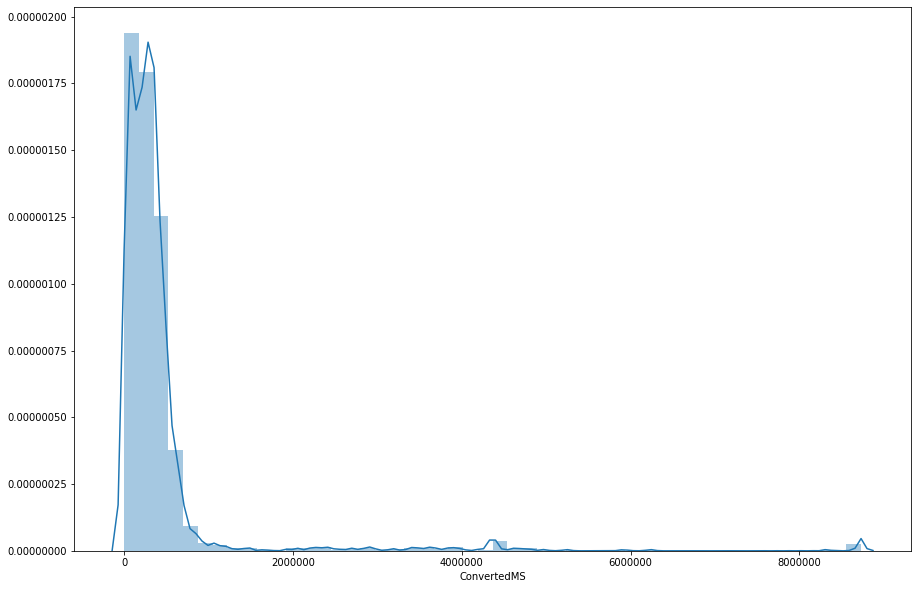

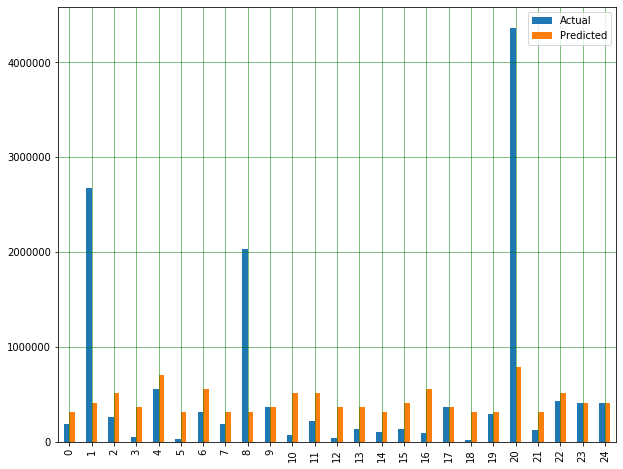

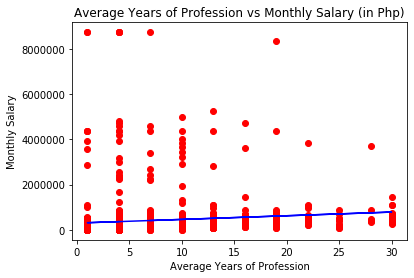

In [ ]:
print(f_df.shape)

print(f_df.describe())

X = f_df[['AverageYears']].values
y = f_df['ConvertedMS'].values

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(f_df['ConvertedMS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Years of Profession vs Monthly Salary (in Php)')
plt.xlabel('Average Years of Profession')
plt.ylabel('Monthly Salary')
plt.show()

In [ ]:
#4 The regression line is not near for the outliers. In the histogram, some of the actual values are too far from the predicted values-